In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
sb.set()
linreg = LinearRegression()

In [3]:
#filename = "C:/Users/faiz_/Desktop/SC1015Project/Engineering_graduate_salary.csv"    
#filename = "C:/Users/kangj/PycharmProjects/EngineerGraduateSalary/Engineering_graduate_salary.csv"   

filename = "Engineering_graduate_salary.csv"   
#add a new line for your own file name and comment this file name when starting the code

In [4]:
df = pd.read_csv(filename)

#df.head()


In [5]:
#df.describe()

DATA THAT I FEEL ARE RELEVANT

In [17]:


gender = pd.DataFrame(df['Gender'])
gradeExamMarks = df[['10percentage', '12percentage','Salary']].copy() #overall marks obtained in grade 10/12 examination
college = df[['CollegeState', 'CollegeCityTier', 'CollegeTier','Salary']].copy()  #collegeNames and Tiers
degree = df[['Degree', 'Specialization','Salary']].copy() #degree and specialisation
scores = df[['English','Logical','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','Salary']].copy()
salary = pd.DataFrame(df[['Salary']])
personality = pd.DataFrame(df[df.columns[28:34]]) #5types of personalies datasets

#scores.describe()

In [18]:
#remove all -1 and store into a newdf
#df.columns[20:28]

newdf = scores[scores["ComputerProgramming"] == -1].index
computerEngineering = scores.drop(newdf)["ComputerProgramming"]
newdf = scores[scores["ElectronicsAndSemicon"] == -1].index
electronicsAndCommunicationEngineering = scores.drop(newdf)["ElectronicsAndSemicon"]
newdf = scores[scores["ComputerScience"] == -1].index
computerScience = scores.drop(newdf)["ComputerScience"]
newdf = scores[scores["MechanicalEngg"] == -1].index
mechanicalEngineering = scores.drop(newdf)["MechanicalEngg"]
newdf = scores[scores["ElectricalEngg"] == -1].index
electricalEngineering = scores.drop(newdf)["ElectricalEngg"]
newdf = scores[scores["TelecomEngg"] == -1].index
electronicsAndTelecommunication = scores.drop(newdf)["TelecomEngg"]
newdf = scores[scores["CivilEngg"] == -1].index
civilEngineering = scores.drop(newdf)["CivilEngg"]


In [19]:
#filter all -1 to median

df['ComputerProgramming']=df['ComputerProgramming'].replace(-1,computerEngineering.median())
df['ElectronicsAndSemicon']=df['ElectronicsAndSemicon'].replace(-1,electronicsAndCommunicationEngineering.median())
df['ComputerScience']=df['ComputerScience'].replace(-1,computerScience.median())
df['MechanicalEngg']=df['MechanicalEngg'].replace(-1,mechanicalEngineering.median())
df['ElectricalEngg']=df['ElectricalEngg'].replace(-1,electricalEngineering.median())
df['TelecomEngg']=df['TelecomEngg'].replace(-1,electronicsAndTelecommunication.median())
df['CivilEngg']=df['CivilEngg'].replace(-1,civilEngineering.median())

gradeExam = df[['English','Logical','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','Salary']].copy()
df = pd.read_csv(filename)
#gradeExam.head(20)
#df.head(20)

Types of question i came up with
    - does gender matter in term of salary
    - does grade10/12 marks matter for salary
    - does the collegeTier has anything to do with salary
    - what degree give the most salary
    - what specialisation give the most salary
    - scores has 11 datasets that may determine the outcome of salary
    - personality has 5 datasets that may  determine the outcome of salary

In [20]:
personality.columns

Index(['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

In [21]:

personality.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.00000,2998.00000,2998.00000,2998.00000,2998.00000,2998.00000
mean,-0.03871,0.12622,-0.00866,-0.14597,-0.14111,305174.78319
std,1.02497,0.95583,0.96270,1.01290,1.00713,212331.19415
min,-3.89330,-5.78160,-4.60090,-2.64300,-7.37570,35000.00000
25%,-0.64910,-0.43530,-0.60480,-0.86820,-0.66920,180000.00000
50%,0.04640,0.21240,0.09140,-0.17270,-0.09430,300000.00000
75%,0.70270,0.81280,0.67200,0.52620,0.50240,370000.00000
max,1.99530,1.90480,2.16170,3.35250,1.63020,4000000.00000


In [22]:
scores.columns

Index(['English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'Salary'],
      dtype='object')

In [23]:
scores.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,Salary
count,2998.00000,2998.00000,2998.00000,2998.00000,2998.00000,2998.00000,2998.00000,2998.00000,2998.00000,2998.00000,2998.00000,2998.00000
mean,501.06638,500.43162,514.13776,0.50846,351.86858,96.22815,94.14710,24.13876,16.26785,31.06838,1.94696,305174.78319
std,105.30451,87.29985,122.19495,0.46337,204.52623,158.73775,177.78454,99.78514,86.05474,103.55296,32.24150,212331.19415
min,180.00000,195.00000,120.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,35000.00000
25%,425.00000,441.25000,430.00000,0.34231,295.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,180000.00000
50%,500.00000,505.00000,515.00000,0.62264,415.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,300000.00000
75%,570.00000,565.00000,595.00000,0.83561,495.00000,233.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,370000.00000
max,875.00000,795.00000,900.00000,0.99991,804.00000,612.00000,715.00000,623.00000,660.00000,548.00000,500.00000,4000000.00000


In [24]:
college.columns

Index(['CollegeState', 'CollegeCityTier', 'CollegeTier', 'Salary'], dtype='object')

In [25]:
college.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,CollegeCityTier,CollegeTier,Salary
count,2998.00000,2998.00000,2998.00000
mean,0.29620,1.92462,305174.78319
std,0.45666,0.26405,212331.19415
min,0.00000,1.00000,35000.00000
25%,0.00000,2.00000,180000.00000
50%,0.00000,2.00000,300000.00000
75%,1.00000,2.00000,370000.00000
max,1.00000,2.00000,4000000.00000


In [26]:
gradeExamMarks.columns

Index(['10percentage', '12percentage', 'Salary'], dtype='object')

In [27]:
gradeExamMarks.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,10percentage,12percentage,Salary
count,2998.00000,2998.00000,2998.00000
mean,77.66626,74.34106,305174.78319
std,10.00278,11.12030,212331.19415
min,43.00000,40.00000,35000.00000
25%,71.14000,66.00000,180000.00000
50%,78.96500,74.00000,300000.00000
75%,85.60000,82.60000,370000.00000
max,97.76000,98.70000,4000000.00000


# Exploratory Analysis

5 Main Categories we can derived from  

- **GradeExamMarks** : Overall marks obtain in different grades of examinations
    - 10percentage: Overall marks obtained in grade 10 examinations
    - 12percentage: Overall marks obtained in grade 12 examinations
    
    
- **Degree** : Current study of degree and specialization
    - Degree: Degree obtained/pursued by the candidate
    - Specialization: Specialization pursed by the candidate
 
 
- **College** : College levels
    - CollegeCityTier: The tier of the city in which the college is located in. This is annotated based on the population of the cities.
    - CollegeTier: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.
    
    
- **AMCAT Scores** : Every Scores related to AMCAT's according to section, -1 values placed if not taken
    - English: Scores in AMCAT English section
    - Logical: Score in AMCAT Logical ability section
    - Quant: Score in AMCAT's Quantitative ability section
    - ComputerProgramming: Score in AMCAT's Computer programming section
    - ElectronicsAndSemicon: Score in AMCAT's Electronics & Semiconductor Engineering section
    - ComputerScience: Score in AMCAT's Computer Science section
    - MechanicalEngg: Score in AMCAT's Mechanical Engineering section
    - ElectricalEngg: Score in AMCAT's Electrical Engineering section
    - TelecomEngg: Score in AMCAT's Telecommunication Engineering section
    - CivilEngg: Score in AMCAT's Civil Engineering section
    
    
- **Personality** : Made up of different sections of AMCAT's personality test
    - conscientiousness: Scores in one of the sections of AMCAT's personality test
    - agreeableness: Scores in one of the sections of AMCAT's personality test
    - extraversion: Scores in one of the sections of AMCAT's personality test
    - nueroticism: Scores in one of the sections of AMCAT's personality test
    - openesstoexperience: Scores in one of the sections of AMCAT's personality test


## Explore the Dataset

>### __GradeExamMarks__: Overall marks obtain in different grades of examinations


In [28]:
print("Data type: ",type(gradeExamMarks))
print("Data dims: ", gradeExamMarks.shape)


Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (2998, 3)


In [29]:
print(gradeExamMarks.dtypes)

10percentage    float64
12percentage    float64
Salary            int64
dtype: object


In [30]:
gradeExamMarks.describe().round(2)

,10percentage,12percentage,Salary
count,2998.00,2998.00,2998.00
mean,77.67,74.34,305174.78
std,10.00,11.12,212331.19
min,43.00,40.00,35000.00
25%,71.14,66.00,180000.00
50%,78.96,74.00,300000.00
75%,85.60,82.60,370000.00
max,97.76,98.70,4000000.00


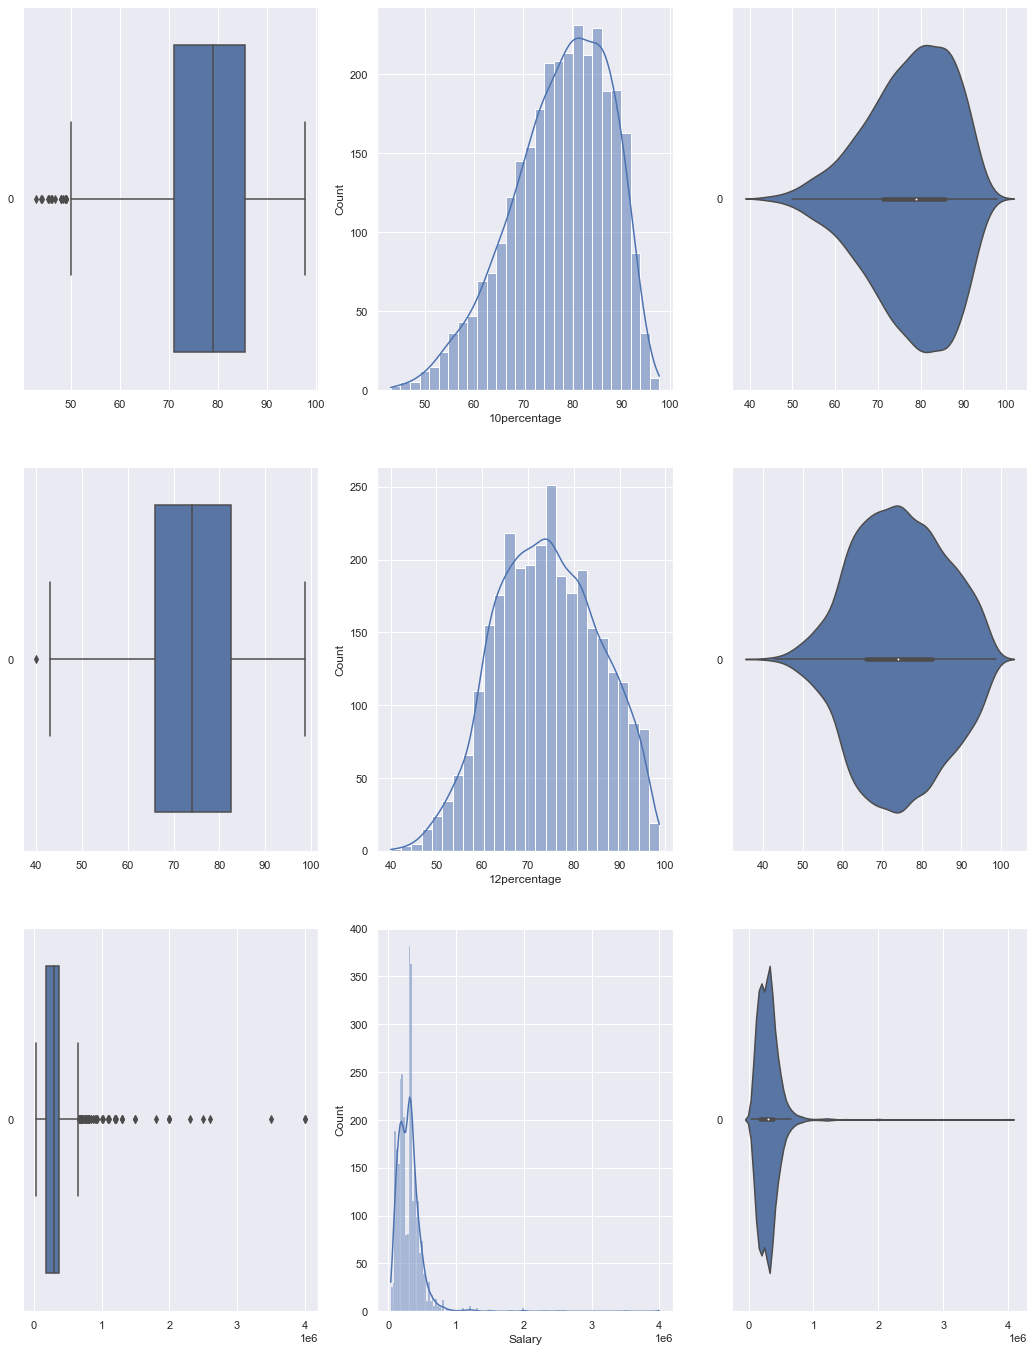

In [31]:
f, axes = plt.subplots(3,3 ,figsize=(18,24))

count = 0
for var in gradeExamMarks:
    sb.boxplot(data = gradeExamMarks[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = gradeExamMarks[var], ax=axes[count,1], kde = True)
    sb.violinplot(data = gradeExamMarks[var], orient ="h", ax = axes[count,2])
    count += 1

              10percentage  12percentage    Salary
10percentage      1.000000      0.645578  0.181414
12percentage      0.645578      1.000000  0.172755
Salary            0.181414      0.172755  1.000000


<AxesSubplot:>

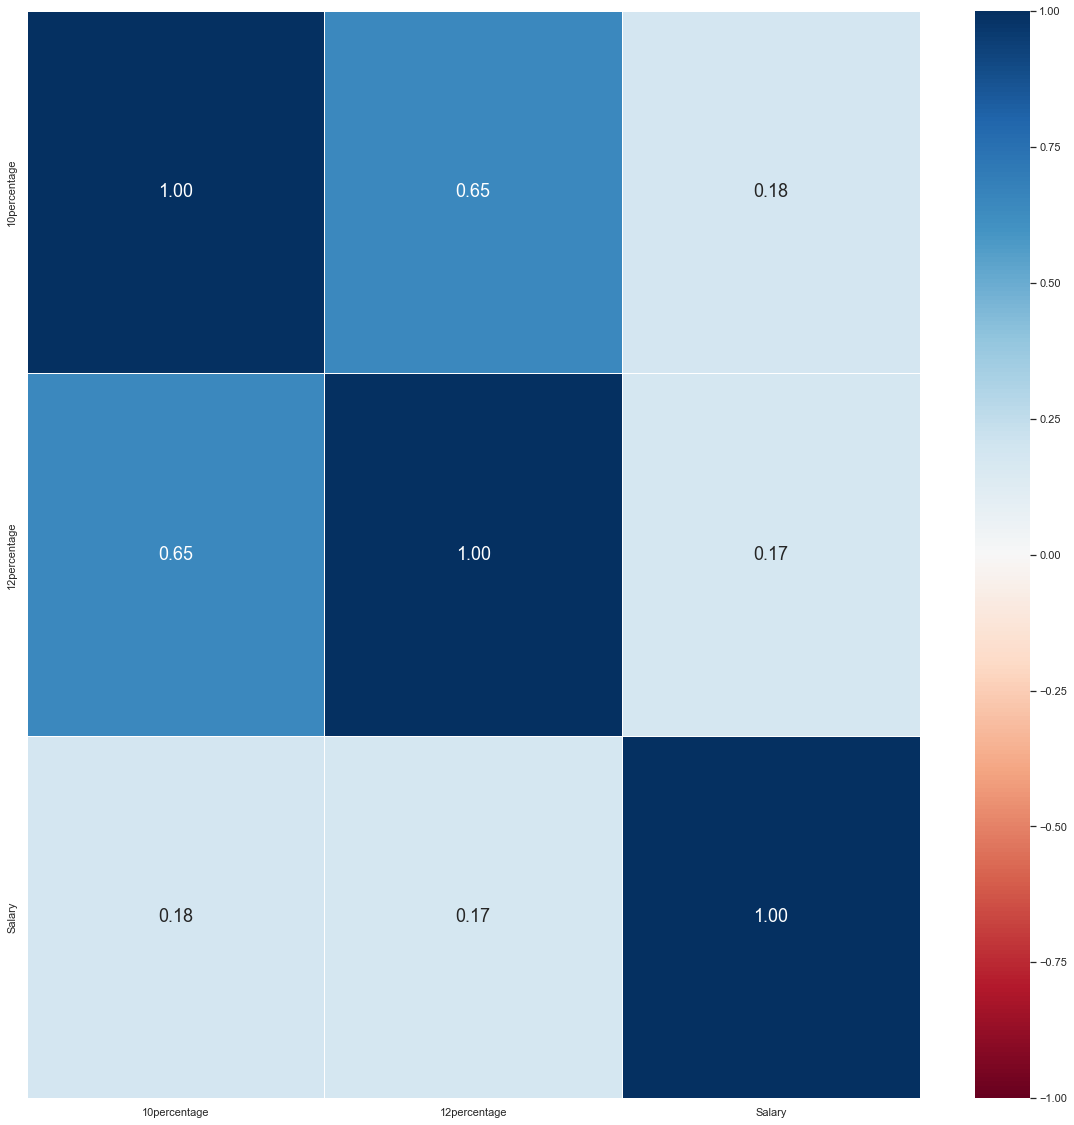

In [32]:
print(gradeExamMarks.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(gradeExamMarks.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

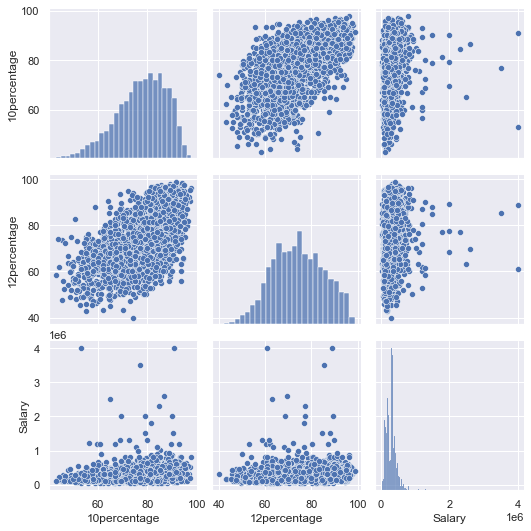

In [33]:
sb.pairplot(data = gradeExamMarks)

## Explore the Dataset

>### __Degree__ : Current study of degree and specialization


In [34]:
print("Data type: ",type(degree))
print("Data dims: ", degree.shape)


Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (2998, 3)


In [35]:
print(degree.dtypes)

Degree            object
Specialization    object
Salary             int64
dtype: object


Number of Types of Degrees : 4
B.Tech/B.E.      2757
MCA               200
M.Tech./M.E.       40
M.Sc. (Tech.)       1
Name: Degree, dtype: int64


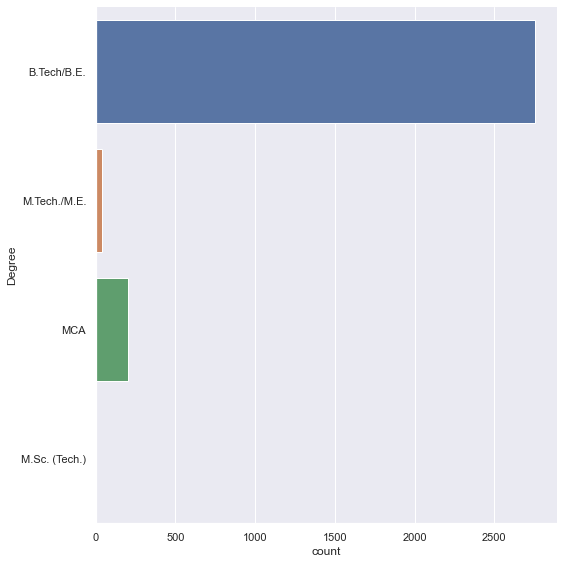

In [36]:
print("Number of Types of Degrees :", len(degree["Degree"].unique()))
print(degree["Degree"].value_counts())

sb.catplot(y = "Degree", data = degree, kind = "count", height = 8)

Number of Types of Specialization : 42
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                       

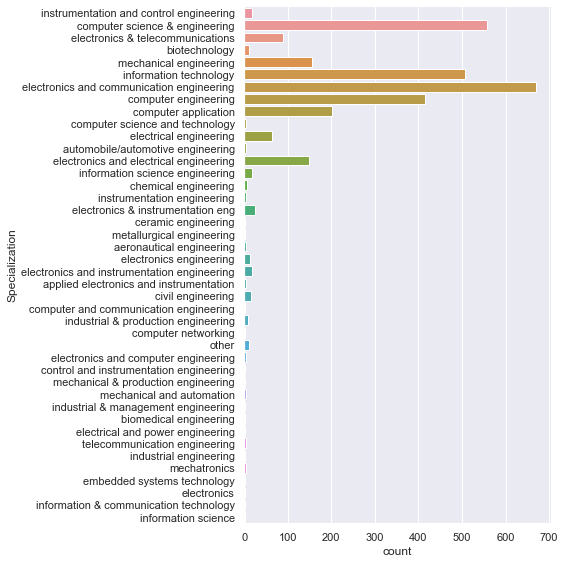

In [37]:
print("Number of Types of Specialization :", len(degree["Specialization"].unique()))
print(degree["Specialization"].value_counts())

sb.catplot(y = "Specialization", data = degree, kind = "count", height = 8)

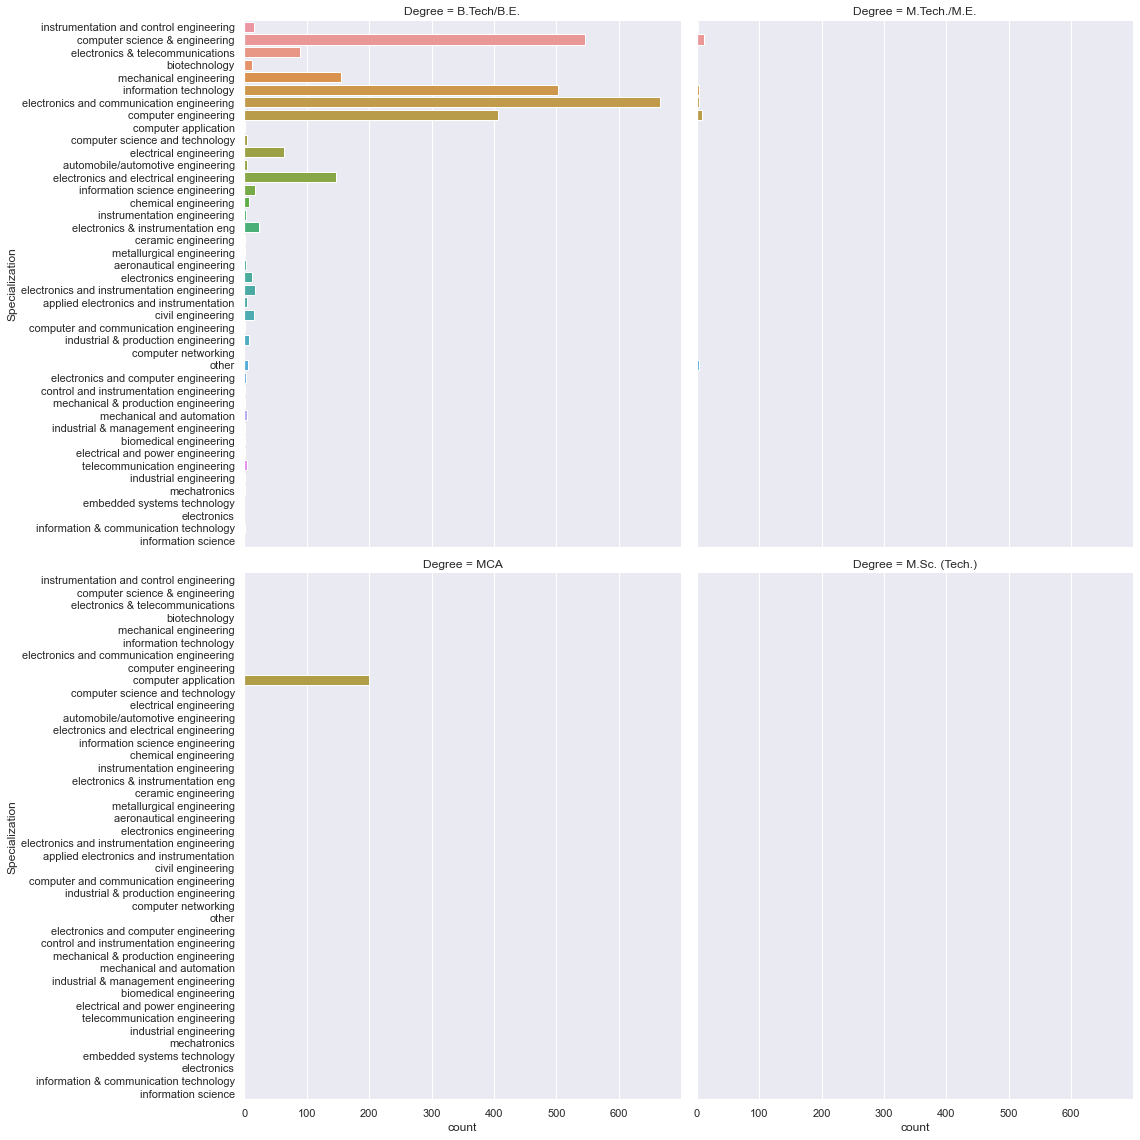

In [38]:
sb.catplot(y = 'Specialization', data = degree, col = 'Degree', kind = 'count', col_wrap = 2, height = 8)

In [39]:
degree = df[df['Degree'].str.contains("B.Tech/B.E.")]
degree = degree[['Degree','Specialization','Salary']]

degree.head()


,Degree,Specialization,Salary
0,B.Tech/B.E.,instrumentation and control engineering,445000
1,B.Tech/B.E.,computer science & engineering,110000
2,B.Tech/B.E.,electronics & telecommunications,255000
3,B.Tech/B.E.,computer science & engineering,420000
4,B.Tech/B.E.,biotechnology,200000


<AxesSubplot:xlabel='Salary', ylabel='Specialization'>

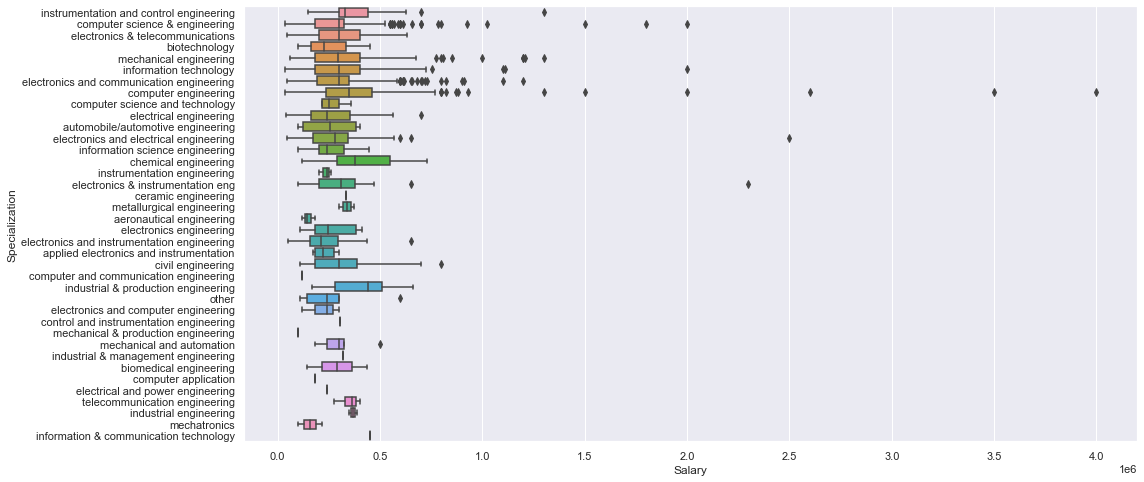

In [40]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'Salary', y = 'Specialization', data = degree)



## Explore the Dataset

>### __College__ : College Levels



In [49]:
print("Data type: ",type(college))
print("Data dims: ", college.shape)


Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (2998, 4)


In [50]:
print(college.dtypes)

CollegeState       object
CollegeCityTier     int64
CollegeTier         int64
Salary              int64
dtype: object


In [51]:
college.describe().round(3)

,CollegeCityTier,CollegeTier,Salary
count,2998.000,2998.000,2998.000
mean,0.296,1.925,305174.783
std,0.457,0.264,212331.194
min,0.000,1.000,35000.000
25%,0.000,2.000,180000.000
50%,0.000,2.000,300000.000
75%,1.000,2.000,370000.000
max,1.000,2.000,4000000.000


ValueError: could not convert string to float: 'Delhi'

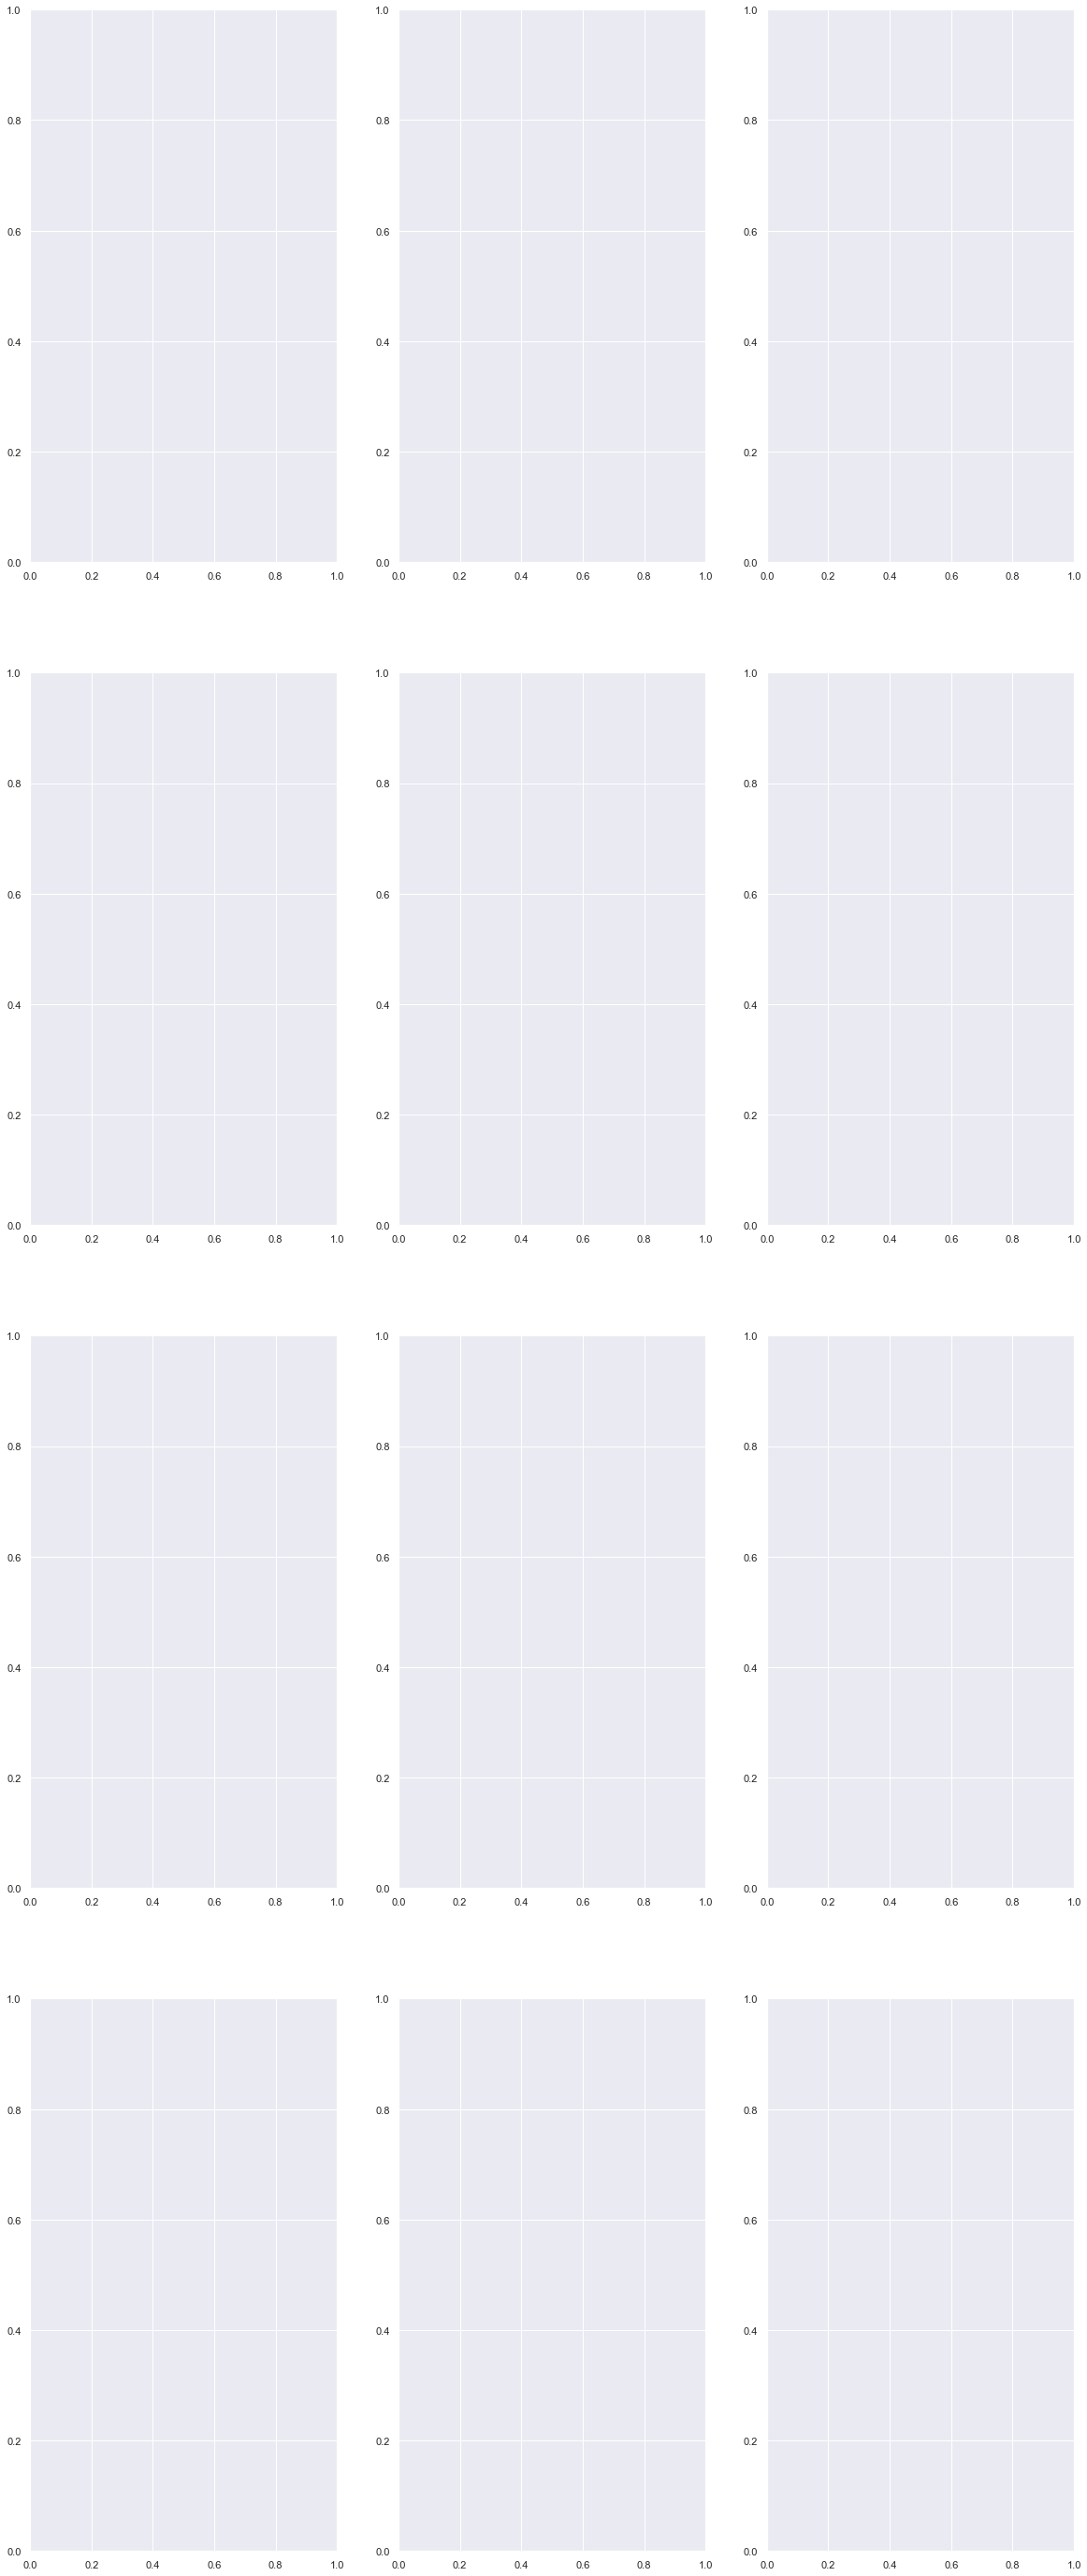

In [60]:
f, axes = plt.subplots(4,3 ,figsize=(20,50))

count = 0
for var in college:
    sb.boxplot(data = college[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = college[var], ax=axes[count,1], kde = True)
    sb.violinplot(data = college[var], orient ="h", ax = axes[count,2])
    count += 1

## Explore the Dataset

>### __AMCAT Scores__ : Every Scores related to AMCAT's according to section, -1 values placed if not taken


In [41]:
print("Data type: ",type(scores))
print("Data dims: ", scores.shape)


Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (2998, 12)


In [42]:
print(scores.dtypes)

English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
MechanicalEngg             int64
ElectricalEngg             int64
TelecomEngg                int64
CivilEngg                  int64
Salary                     int64
dtype: object


In [43]:
scores.describe().round(3)

,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,Salary
count,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000
mean,501.066,500.432,514.138,0.508,351.869,96.228,94.147,24.139,16.268,31.068,1.947,305174.783
std,105.305,87.300,122.195,0.463,204.526,158.738,177.785,99.785,86.055,103.553,32.242,212331.194
min,180.000,195.000,120.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,35000.000
25%,425.000,441.250,430.000,0.342,295.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,180000.000
50%,500.000,505.000,515.000,0.623,415.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,300000.000
75%,570.000,565.000,595.000,0.836,495.000,233.000,-1.000,-1.000,-1.000,-1.000,-1.000,370000.000
max,875.000,795.000,900.000,1.000,804.000,612.000,715.000,623.000,660.000,548.000,500.000,4000000.000


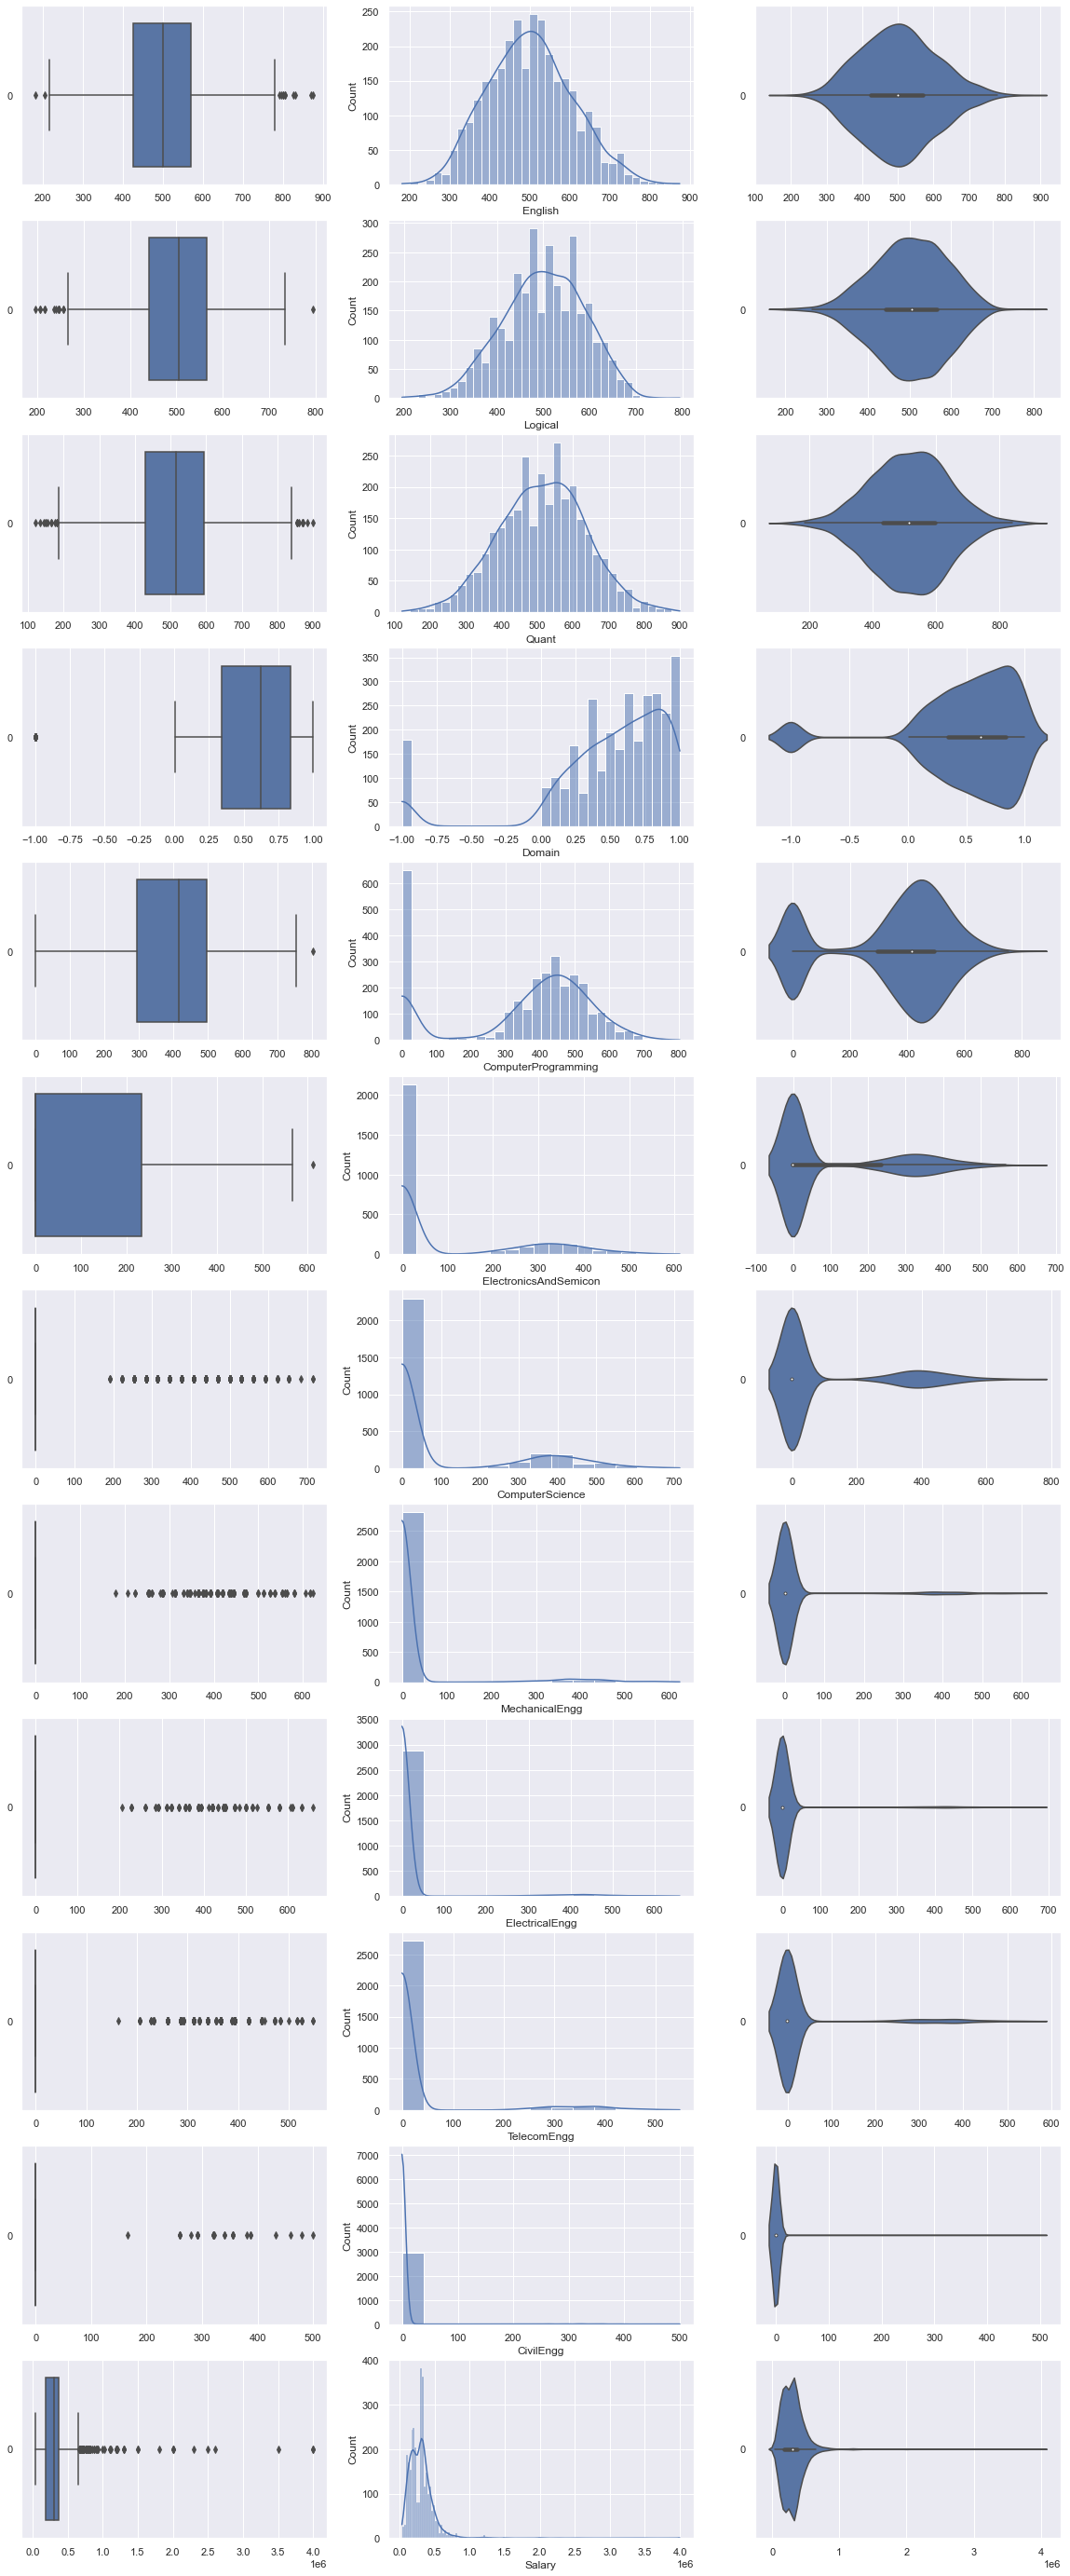

In [44]:
f, axes = plt.subplots(12,3 ,figsize=(20,50))

count = 0
for var in scores:
    sb.boxplot(data = scores[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = scores[var], ax=axes[count,1], kde = True)
    sb.violinplot(data = scores[var], orient ="h", ax = axes[count,2])
    count += 1

                        English   Logical     Quant    Domain  \
English                1.000000  0.441358  0.375415  0.097777   
Logical                0.441358  1.000000  0.511049  0.178285   
Quant                  0.375415  0.511049  1.000000  0.219296   
Domain                 0.097777  0.178285  0.219296  1.000000   
ComputerProgramming    0.128537  0.179326  0.146238  0.308296   
ElectronicsAndSemicon  0.019831  0.004572  0.121459  0.092298   
ComputerScience        0.072639  0.056551 -0.026077  0.072620   
MechanicalEngg        -0.005057 -0.015491  0.002042  0.044702   
ElectricalEngg         0.022872  0.008607  0.028883  0.035305   
TelecomEngg            0.001632 -0.005502  0.034318  0.024405   
CivilEngg             -0.028576 -0.027270 -0.023578  0.013898   
Salary                 0.179668  0.193647  0.239345  0.132845   

                       ComputerProgramming  ElectronicsAndSemicon  \
English                           0.128537               0.019831   
Logical         

<AxesSubplot:>

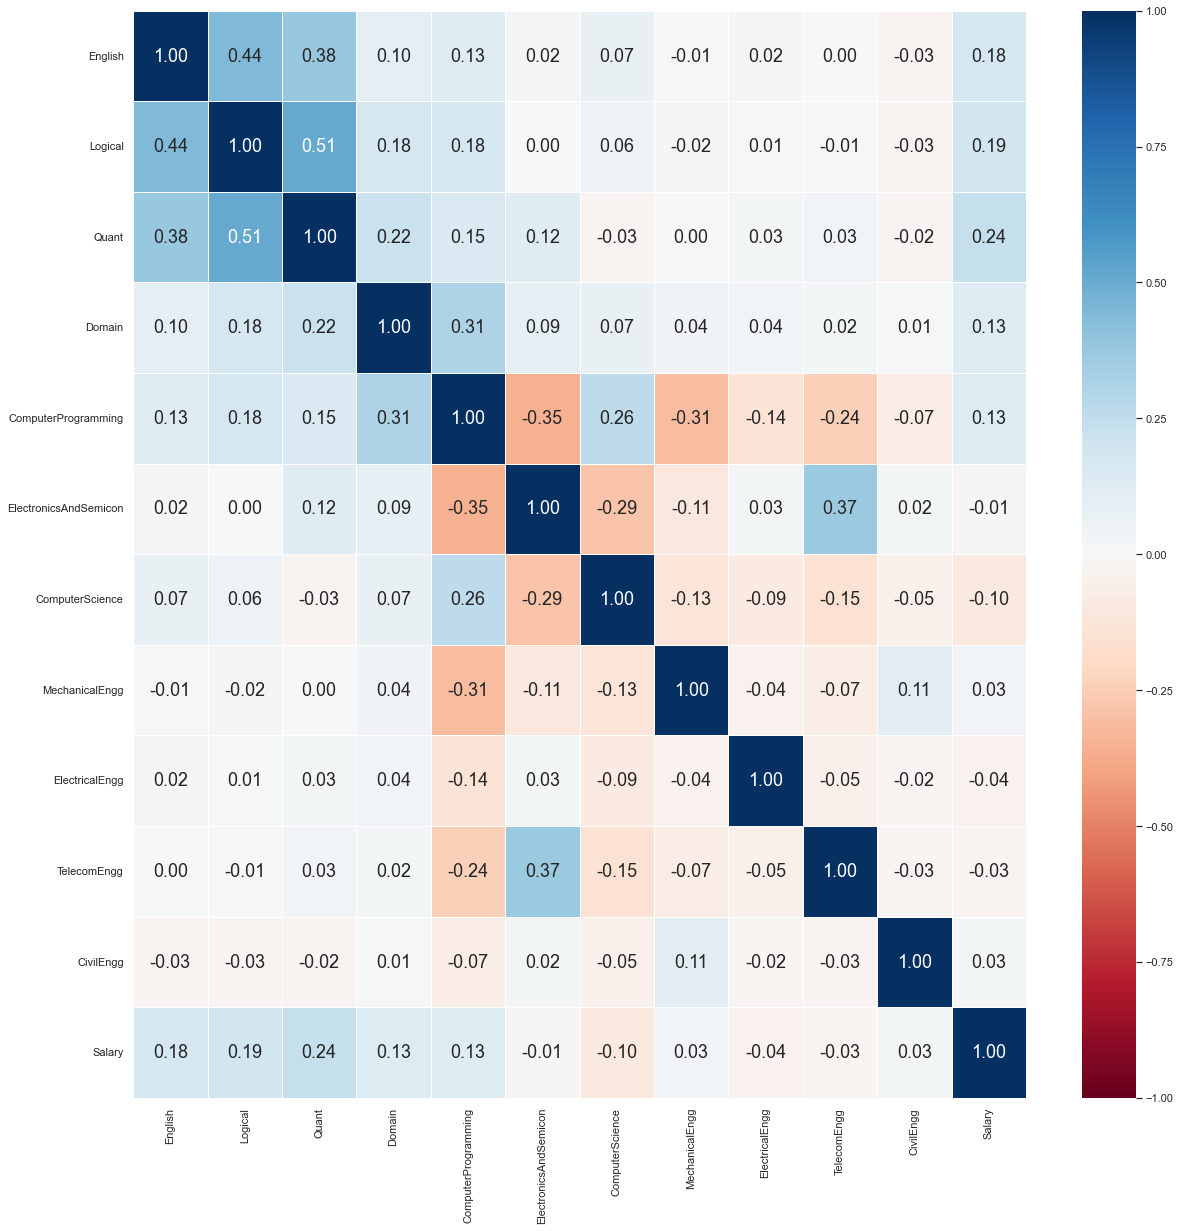

In [45]:
print(scores.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(scores.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

## Explore the Dataset

>### __Personality__ : Made up of different sections of AMCAT's personality test


In [46]:
print("Data type: ",type(personality))
print("Data dims: ", personality.shape)

Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (2998, 6)


In [47]:
print(personality.dtypes)

conscientiousness        float64
agreeableness            float64
extraversion             float64
nueroticism              float64
openess_to_experience    float64
Salary                     int64
dtype: object


In [48]:
personality.describe().round(2)

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.00,2998.00,2998.00,2998.00,2998.00,2998.00
mean,-0.04,0.13,-0.01,-0.15,-0.14,305174.78
std,1.02,0.96,0.96,1.01,1.01,212331.19
min,-3.89,-5.78,-4.60,-2.64,-7.38,35000.00
25%,-0.65,-0.44,-0.60,-0.87,-0.67,180000.00
50%,0.05,0.21,0.09,-0.17,-0.09,300000.00
75%,0.70,0.81,0.67,0.53,0.50,370000.00
max,2.00,1.90,2.16,3.35,1.63,4000000.00


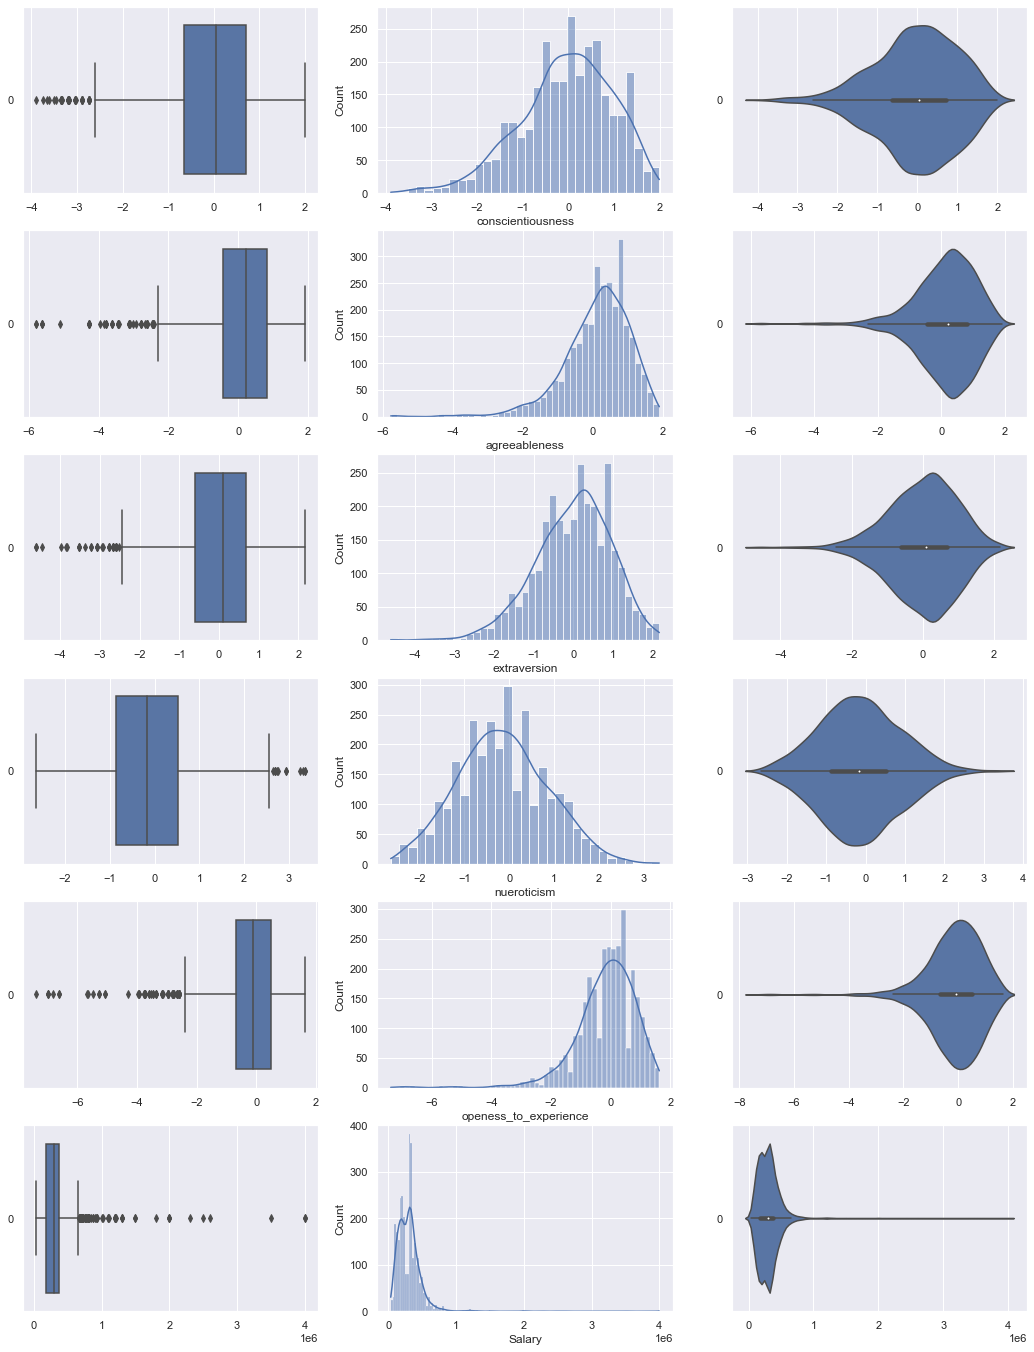

In [28]:
f, axes = plt.subplots(6,3,figsize=(18,24))

count = 0
for var in personality:
    sb.boxplot(data = personality[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = personality[var], ax=axes[count,1], kde = True)
    sb.violinplot(data = personality[var], orient ="h", ax = axes[count,2])
    count += 1

                       conscientiousness  agreeableness  extraversion  \
conscientiousness               1.000000       0.492582      0.369782   
agreeableness                   0.492582       1.000000      0.463800   
extraversion                    0.369782       0.463800      1.000000   
nueroticism                    -0.323617      -0.211130     -0.093622   
openess_to_experience           0.403040       0.592820      0.447718   
Salary                         -0.047134       0.074756     -0.004930   

                       nueroticism  openess_to_experience    Salary  
conscientiousness        -0.323617               0.403040 -0.047134  
agreeableness            -0.211130               0.592820  0.074756  
extraversion             -0.093622               0.447718 -0.004930  
nueroticism               1.000000              -0.066933 -0.069983  
openess_to_experience    -0.066933               1.000000  0.000940  
Salary                   -0.069983               0.000940  1.000000 

<AxesSubplot:>

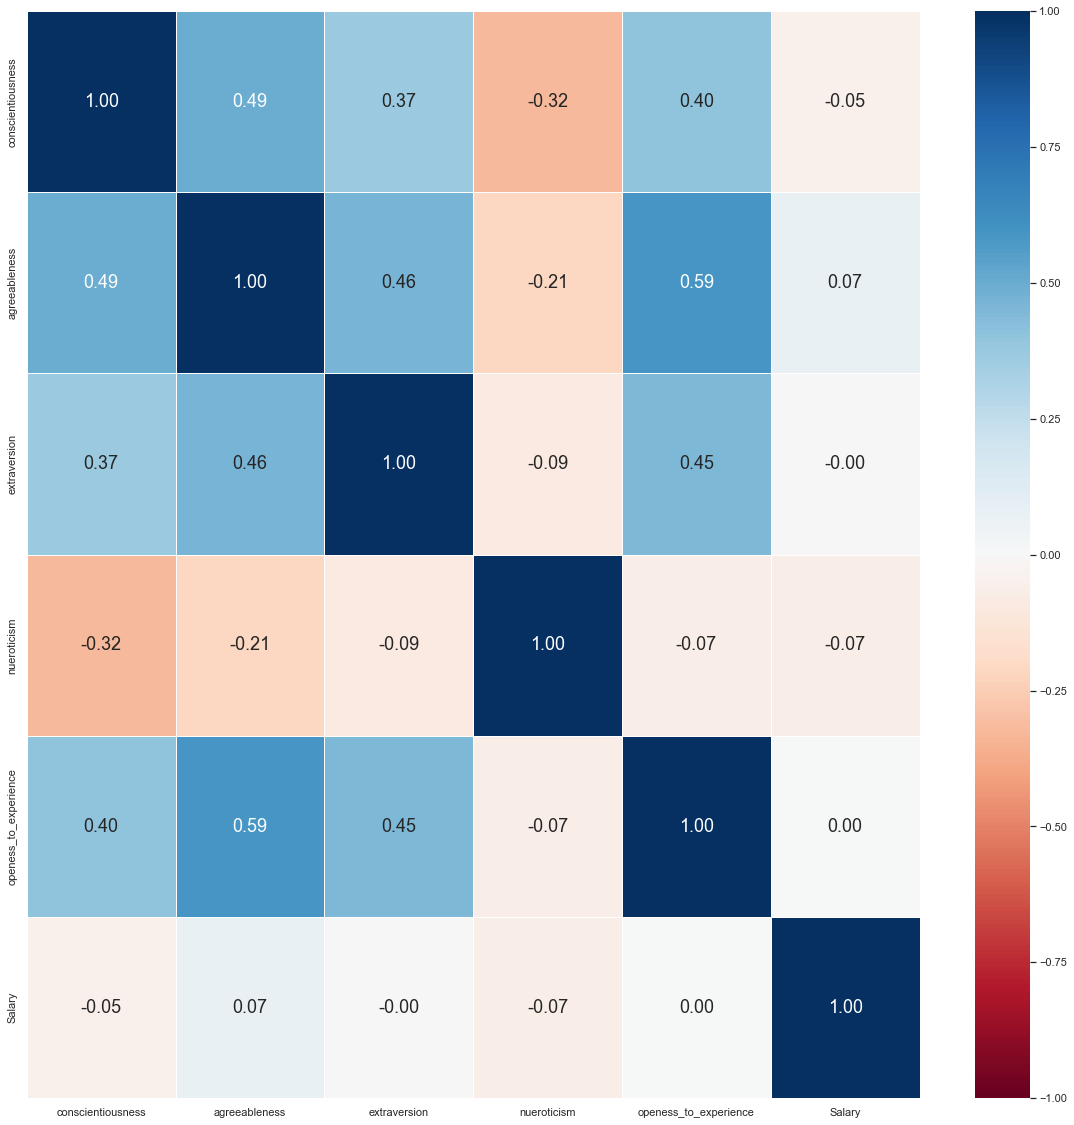

In [29]:
print(personality.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(personality.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

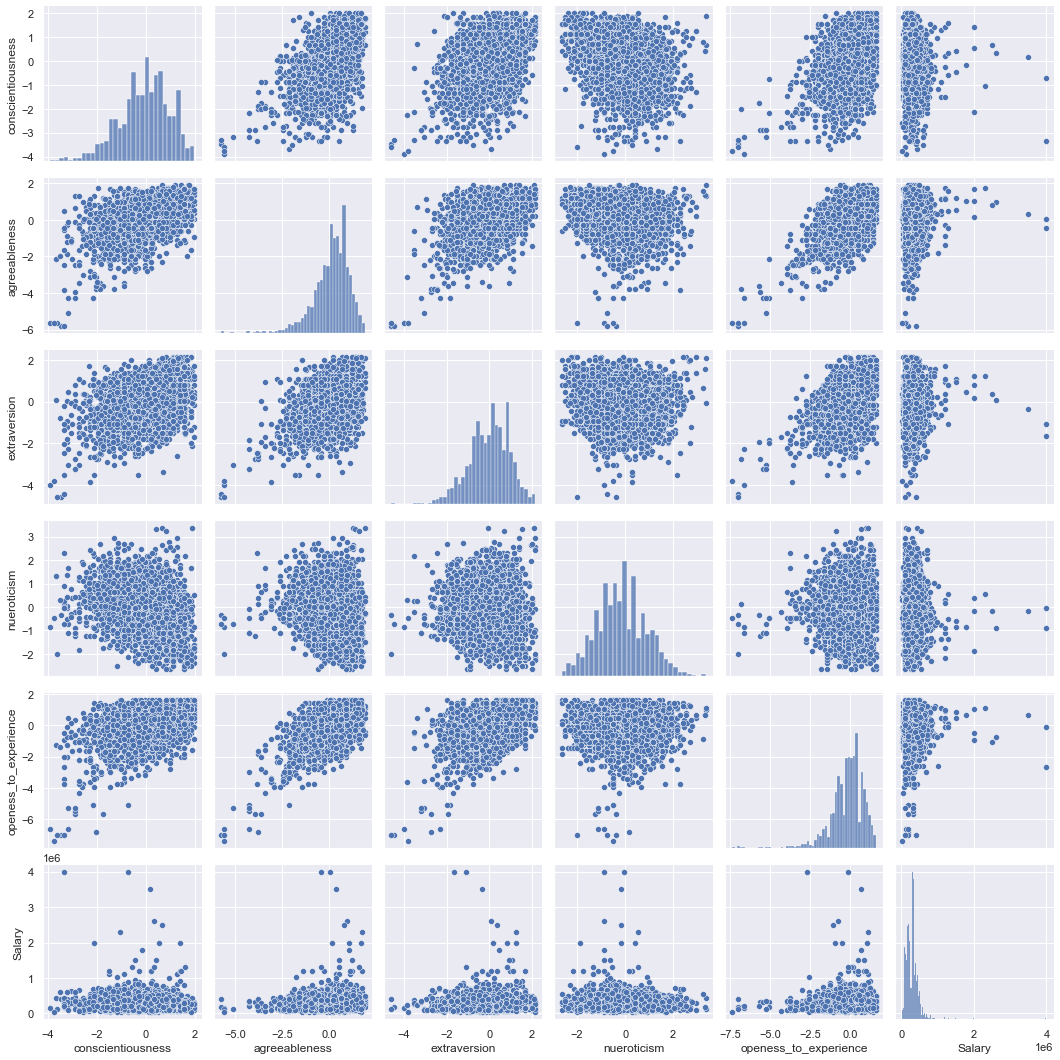

In [30]:
sb.pairplot(data = personality)